# NLP avec la bibliothèque NLTK
Ce notebook utilise la biliothèque NLTK afin d'extraire des données textuelles issue de l'API Judilibre

 ## Import

In [5]:
import json
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk import FreqDist



## Tokenisation

In [6]:
def get_text(file):
  """
  Extraire le texte intégrale de la décision 
  """
  with open(file, 'r') as f:
    data = json.load(f)

  return data["text"]

In [7]:
worf_quote = get_text("data.json")
words_in_quote = word_tokenize(worf_quote)

stop_words = set(stopwords.words("french"))
filtered_list = [word for word in words_in_quote if word.casefold() not in stop_words]
print(filtered_list)


['CIV', '.', '2', 'CM', 'COUR', 'CASSATION', '______________________', 'Audience', 'publique', '27', 'mai', '2021', 'Cassation', 'partielle', 'sans', 'renvoi', 'M.', 'PIREYRE', ',', 'prÃ©sident', 'ArrÃªt', 'nÂ°', '476', 'FS-P+R', 'Pourvoi', 'nÂ°', 'U', '19-23.898', 'R', 'Ã‰', 'P', 'U', 'B', 'I', 'Q', 'U', 'E', 'F', 'R', 'A', 'Ã‡', 'A', 'I', 'E', '_________________________', 'NOM', 'PEUPLE', 'FRANÃ‡AIS', '_________________________', 'ARRÃŠT', 'COUR', 'CASSATION', ',', 'DEUXIÃˆME', 'CHAMBRE', 'CIVILE', ',', '27', 'MAI', '2021', 'M.', '[', ']', '[', 'O', ']', ',', 'domiciliÃ©', 'lieudit', '[', 'Adresse', '1', ']', ',', 'a', 'formÃ©', 'pourvoi', 'nÂ°', 'U', '19-23.898', 'contre', 'jugement', 'rendu', '5', 'septembre', '2019', 'tribunal', "d'instance", 'Vannes', ',', 'litige', "l'opposant", ':', '1Â°/', 'Ã', 'M.', '[', 'A', ']', '[', 'E', ']', ',', '2Â°/', 'Ã', 'Mme', '[', 'K', ']', '[', 'W', ']', ',', 'Ã©pouse', '[', 'E', ']', ',', 'tous', 'deux', 'domiciliÃ©s', 'lieudit', '[', 'Adresse', 

## Stemmatisation

In [8]:
stemmer = SnowballStemmer(language="french")
stemmed_words = [stemmer.stem(word) for word in filtered_list]
print(stemmed_words)

['civ', '.', '2', 'cm', 'cour', 'cassat', '______________________', 'audienc', 'publiqu', '27', 'mai', '2021', 'cassat', 'partiel', 'san', 'renvoi', 'm.', 'pireyr', ',', 'prã©sident', 'arrãªt', 'nâ°', '476', 'fs-p+r', 'pourvoi', 'nâ°', 'u', '19-23.898', 'r', 'ã‰', 'p', 'u', 'b', 'i', 'q', 'u', 'e', 'f', 'r', 'a', 'ã‡', 'a', 'i', 'e', '_________________________', 'nom', 'peupl', 'franã‡', '_________________________', 'arrãšt', 'cour', 'cassat', ',', 'deuxiãˆm', 'chambr', 'civil', ',', '27', 'mai', '2021', 'm.', '[', ']', '[', 'o', ']', ',', 'domiciliã©', 'lieud', '[', 'adress', '1', ']', ',', 'a', 'formã©', 'pourvoi', 'nâ°', 'u', '19-23.898', 'contr', 'jug', 'rendu', '5', 'septembr', '2019', 'tribunal', "d'instanc", 'vann', ',', 'litig', "l'oppos", ':', '1â°/', 'ã', 'm.', '[', 'a', ']', '[', 'e', ']', ',', '2â°/', 'ã', 'mme', '[', 'k', ']', '[', 'w', ']', ',', 'ã©pous', '[', 'e', ']', ',', 'tous', 'deux', 'domiciliã©', 'lieud', '[', 'adress', '2', ']', ',', 'dã©fendeur', 'ã', 'cassat', 

## POS tagging


In [9]:
l_pos_tag = nltk.pos_tag(stemmed_words)
print(l_pos_tag)

[('civ', 'NN'), ('.', '.'), ('2', 'CD'), ('cm', 'JJ'), ('cour', 'NN'), ('cassat', 'NN'), ('______________________', 'NNP'), ('audienc', 'VBZ'), ('publiqu', 'JJ'), ('27', 'CD'), ('mai', 'NN'), ('2021', 'CD'), ('cassat', 'NN'), ('partiel', 'NN'), ('san', 'JJ'), ('renvoi', 'NN'), ('m.', 'NN'), ('pireyr', 'NN'), (',', ','), ('prã©sident', 'JJ'), ('arrãªt', 'NN'), ('nâ°', 'RB'), ('476', 'CD'), ('fs-p+r', 'JJ'), ('pourvoi', 'NN'), ('nâ°', 'JJ'), ('u', 'JJ'), ('19-23.898', 'JJ'), ('r', 'NN'), ('ã‰', 'NNP'), ('p', 'NN'), ('u', 'NN'), ('b', 'NN'), ('i', 'NN'), ('q', 'VBP'), ('u', 'JJ'), ('e', 'NN'), ('f', 'NN'), ('r', 'VBZ'), ('a', 'DT'), ('ã‡', 'NN'), ('a', 'DT'), ('i', 'NN'), ('e', 'NN'), ('_________________________', 'NNP'), ('nom', 'CC'), ('peupl', 'JJ'), ('franã‡', 'NN'), ('_________________________', 'NNP'), ('arrãšt', 'VBZ'), ('cour', 'JJ'), ('cassat', 'NN'), (',', ','), ('deuxiãˆm', 'JJ'), ('chambr', 'NN'), ('civil', 'JJ'), (',', ','), ('27', 'CD'), ('mai', 'NN'), ('2021', 'CD'), ('m.',

## Lemmatisation

In [10]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_in_quote]
print(lemmatized_words)

['CIV', '.', '2', 'CM', 'COUR', 'DE', 'CASSATION', '______________________', 'Audience', 'publique', 'du', '27', 'mai', '2021', 'Cassation', 'partielle', 'sans', 'renvoi', 'M.', 'PIREYRE', ',', 'prÃ©sident', 'ArrÃªt', 'nÂ°', '476', 'FS-P+R', 'Pourvoi', 'nÂ°', 'U', '19-23.898', 'R', 'Ã‰', 'P', 'U', 'B', 'L', 'I', 'Q', 'U', 'E', 'F', 'R', 'A', 'N', 'Ã‡', 'A', 'I', 'S', 'E', '_________________________', 'AU', 'NOM', 'DU', 'PEUPLE', 'FRANÃ‡AIS', '_________________________', 'ARRÃŠT', 'DE', 'LA', 'COUR', 'DE', 'CASSATION', ',', 'DEUXIÃˆME', 'CHAMBRE', 'CIVILE', ',', 'DU', '27', 'MAI', '2021', 'M.', '[', 'T', ']', '[', 'O', ']', ',', 'domiciliÃ©', 'lieudit', '[', 'Adresse', '1', ']', ',', 'a', 'formÃ©', 'le', 'pourvoi', 'nÂ°', 'U', '19-23.898', 'contre', 'le', 'jugement', 'rendu', 'le', '5', 'septembre', '2019', 'par', 'le', 'tribunal', "d'instance", 'de', 'Vannes', ',', 'dans', 'le', 'litige', "l'opposant", ':', '1Â°/', 'Ã', 'M.', '[', 'A', ']', '[', 'E', ']', ',', '2Â°/', 'Ã', 'Mme', '[', 

## Named Entity Recognition (NER)

In [11]:
def extract_ne(quote):
     words = word_tokenize(quote, language="french")
     tags = nltk.pos_tag(words)
     tree = nltk.ne_chunk(tags, binary=True)
     return set(
         " ".join(i[0] for i in t)
         for t in tree
         if hasattr(t, "label") and t.label() == "NE"
     )

extract_ne(worf_quote)

{'ANNEXE',
 'ARRÃŠT DE LA',
 'AUX',
 'ArrÃªt',
 'Bull',
 'CASSE ET ANNULE',
 'CIV',
 'Carole',
 'Chambre',
 'Condamne',
 'Conseil',
 'DEUXIÃˆME',
 'Examen',
 'MOTIFS QU',
 'MOYEN',
 'Martin Le Guerer',
 'Mme',
 'Mme Bouvier',
 'PAR',
 'Partie',
 'Pradel',
 'SCP Alain',
 'SCP Bernard',
 'SCP Piwnica',
 'Vannes',
 'arrÃªt',
 'arrÃªt Moyen',
 'arrÃªt de'}

## Analyse des textes

In [12]:
text = Text(words_in_quote) # objet text pour la concordance
res = text.concordance("tribunal") 
print(res)

Displaying 11 of 11 matches:
t rendu le 5 septembre 2019 par le tribunal d'instance de Vannes , dans le lit
e 2 . Selon le jugement attaquÃ© ( tribunal d'instance de Vannes , 5 septembre
sÃ© au demandeur en cassation , le tribunal a violÃ© les articles 1240 du code
faute . 9 . En statuant ainsi , le tribunal a violÃ© le texte susvisÃ© . PortÃ
 irrÃ©pÃ©tibles exposÃ©s devant le tribunal . PAR CES MOTIFS , et sans qu'il y
 2019 , entre les parties , par le tribunal d'instance de Vannes ; DIT n ' y a
ce compris ceux exposÃ©s devant le tribunal ; En application de l'article 700 
la Cour de cassation que devant le tribunal d'instance de Vannes ; Dit que sur
ne instance est en cours devant le tribunal de grande instance de Vannes sur a
sÃ© au demandeur en cassation , le tribunal a violÃ© les articles 1240 du Code
] Ã constituer avocat en vain , le tribunal a encore violÃ© l'article 1240 du 
None


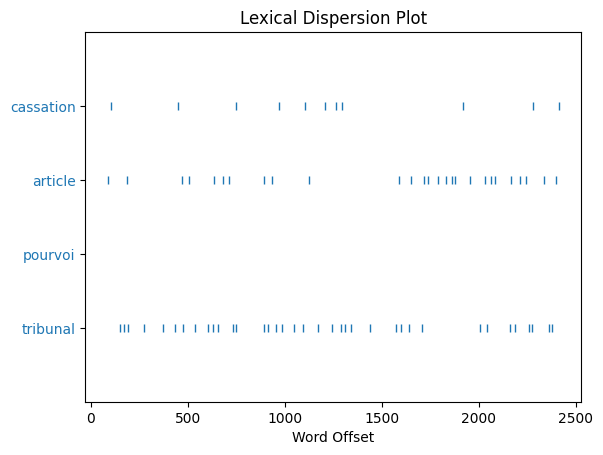

In [13]:
text.dispersion_plot(["tribunal", "pourvoi", "article", "cassation"])

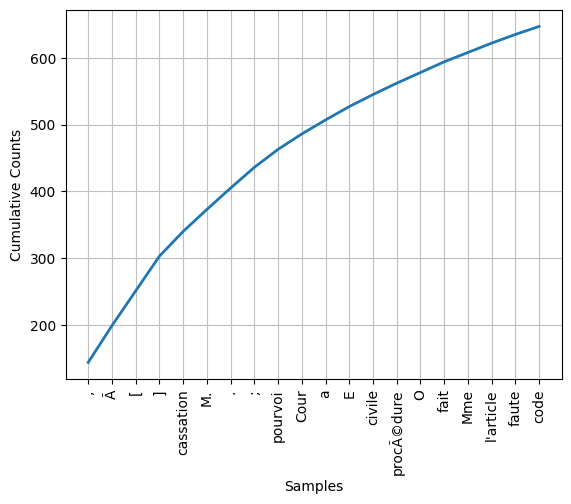

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [14]:
frequency_distribution = FreqDist(filtered_list)
frequency_distribution.plot(20, cumulative=True)

In [15]:
text.collocations()

procÃ©dure civile; mÃ©moire contenant; des frais; une faute; droit
invoquÃ©s; dÃ©lai requis; son pourvoi; prÃ©sent arrÃªt; 200 euros;
tribunal d'instance; l'article 700; qu'en retenant; septembre 2019;
les moyens; dÃ©cision attaquÃ©e; constitution d'avocat; constitue pas;
800 euros; l'article 978; titre des
